# 01. Exploración de Datos Públicos - AeroSafe Risk Predictor

**Objetivo:** Realizar el Análisis Exploratorio de Datos (EDA) de un dataset público de aviación (NTSB/FAA) para identificar variables clave de riesgo.

---

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración de visualización
%matplotlib inline
sns.set(style="whitegrid")

## 1. Carga de Datos
Cargaremos el dataset descargado en la carpeta `data/raw/`.

In [14]:
import os

print(os.getcwd())                  
print(os.listdir("../data/raw"))    

d:\UTP\Empresa Aeronáutica\aerosafe-risk-predictor\notebooks
['Bird_strikes.csv']


In [15]:
import pandas as pd

data_path = r"D:\UTP\Empresa Aeronáutica\aerosafe-risk-predictor\data\raw\Bird_strikes.csv"

df = pd.read_csv(data_path, encoding="latin1")
df.head()

,RecordID,AircraftType,AirportName,AltitudeBin,MakeModel,NumberStruck,NumberStruckActual,Effect,FlightDate,Damage,...,RemainsSentToSmithsonian,Remarks,WildlifeSize,ConditionsSky,WildlifeSpecies,PilotWarned,Cost,Altitude,PeopleInjured,IsAircraftLarge?
0,202152,Airplane,LAGUARDIA NY,"(1000, 2000]",B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736",1500,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,"(-1, 0]",MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,"(30, 50]",C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,"(30, 50]",B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,"(30, 50]",CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [16]:
df.shape, df.columns

((25429, 26),
 Index(['RecordID', 'AircraftType', 'AirportName', 'AltitudeBin', 'MakeModel',
        'NumberStruck', 'NumberStruckActual', 'Effect', 'FlightDate', 'Damage',
        'Engines', 'Operator', 'OriginState', 'FlightPhase',
        'ConditionsPrecipitation', 'RemainsCollected?',
        'RemainsSentToSmithsonian', 'Remarks', 'WildlifeSize', 'ConditionsSky',
        'WildlifeSpecies', 'PilotWarned', 'Cost', 'Altitude', 'PeopleInjured',
        'IsAircraftLarge?'],
       dtype='object'))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25429 entries, 0 to 25428
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   RecordID                  25429 non-null  int64 
 1   AircraftType              25429 non-null  object
 2   AirportName               25429 non-null  object
 3   AltitudeBin               25429 non-null  object
 4   MakeModel                 25429 non-null  object
 5   NumberStruck              25429 non-null  object
 6   NumberStruckActual        25429 non-null  int64 
 7   Effect                    2078 non-null   object
 8   FlightDate                25429 non-null  object
 9   Damage                    25429 non-null  object
 10  Engines                   25195 non-null  object
 11  Operator                  25429 non-null  object
 12  OriginState               24980 non-null  object
 13  FlightPhase               25429 non-null  object
 14  ConditionsPrecipitatio

In [18]:
df.describe(include="all")

,RecordID,AircraftType,AirportName,AltitudeBin,MakeModel,NumberStruck,NumberStruckActual,Effect,FlightDate,Damage,...,RemainsSentToSmithsonian,Remarks,WildlifeSize,ConditionsSky,WildlifeSpecies,PilotWarned,Cost,Altitude,PeopleInjured,IsAircraftLarge?
count,25429.000000,25429,25429,25429,25429,25429,25429.000000,2078,25429,25429,...,25429,20668,25429,25429,25429,25429,25429,25429.000000,25429.000000,25429
unique,NaN,1,1109,13,324,4,NaN,4,4225,2,...,2,18076,3,3,345,2,792,NaN,NaN,2
top,NaN,Airplane,DALLAS/FORT WORTH INTL ARPT,"(-1, 0]",B-737-700,1,NaN,Precautionary Landing,10/28/10 0:00,No damage,...,False,NO DMG.,Small,No Cloud,Unknown bird - small,N,0,NaN,NaN,No
freq,NaN,25429,803,9843,2488,20790,NaN,1121,28,22975,...,23479,734,17412,12575,10436,14567,24215,NaN,NaN,17027
mean,253800.148767,NaN,NaN,NaN,NaN,NaN,2.699634,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,799.028432,0.000826,NaN
std,38472.800499,NaN,NaN,NaN,NaN,NaN,12.825804,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1740.079843,0.047339,NaN
min,1195.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,225742.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
50%,248609.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,0.000000,NaN
75%,269044.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700.000000,0.000000,NaN


In [19]:
cols_check = ["Damage", "AircraftType", "WildlifeSize", "ConditionsSky", "AirportName"]
for c in cols_check:
    if c in df.columns:
        print(f"\n=== {c} ===")
        print(df[c].value_counts(dropna=False).head(10))


=== Damage ===
Damage
No damage        22975
Caused damage     2454
Name: count, dtype: int64

=== AircraftType ===
AircraftType
Airplane    25429
Name: count, dtype: int64

=== WildlifeSize ===
WildlifeSize
Small     17412
Medium     5937
Large      2080
Name: count, dtype: int64

=== ConditionsSky ===
ConditionsSky
No Cloud      12575
Some Cloud     8659
Overcast       4195
Name: count, dtype: int64

=== AirportName ===
AirportName
DALLAS/FORT WORTH INTL ARPT    803
SACRAMENTO INTL                676
SALT LAKE CITY INTL            479
DENVER INTL AIRPORT            476
KANSAS CITY INTL               452
PHILADELPHIA INTL              442
ORLANDO INTL                   408
BALTIMORE WASH INTL            401
LOUISVILLE INTL ARPT           395
JOHN F KENNEDY INTL            390
Name: count, dtype: int64


## 2. Exploración Univariada y Bivariada.


### 2.1 Distribución de la variable objetivo Damage

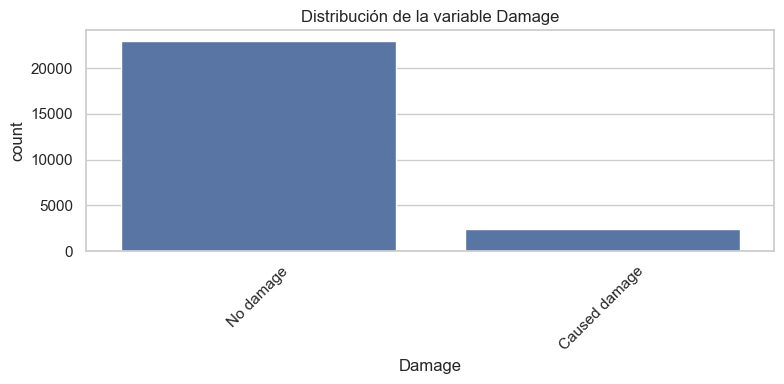

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Damage", order=df["Damage"].value_counts().index)
plt.title("Distribución de la variable Damage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2.2 Tipos de aeronave más frecuentes

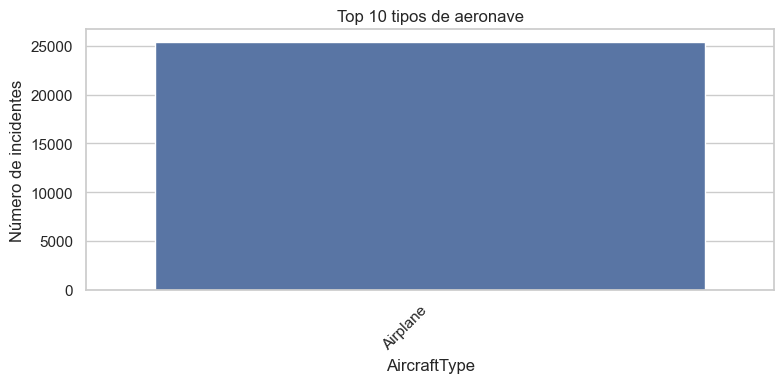

In [21]:
plt.figure(figsize=(8, 4))
top_aircraft = df["AircraftType"].value_counts().head(10)
sns.barplot(x=top_aircraft.index, y=top_aircraft.values)
plt.title("Top 10 tipos de aeronave")
plt.ylabel("Número de incidentes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 2.3 Aeropuertos con más incidentes

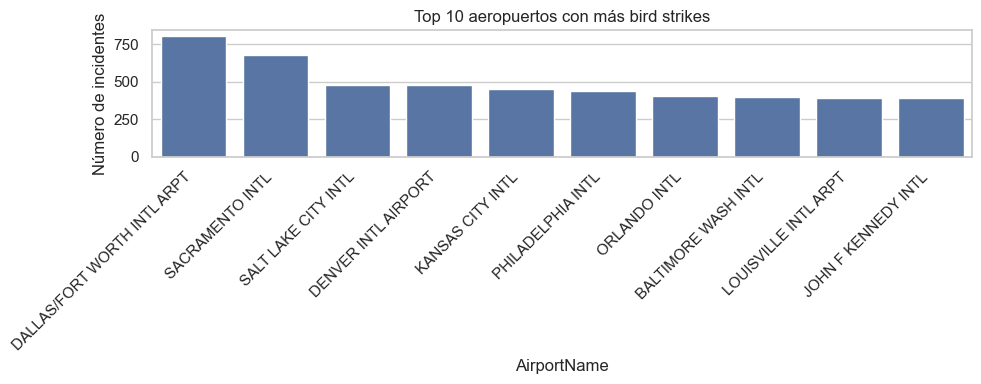

In [22]:
plt.figure(figsize=(10, 4))
top_airports = df["AirportName"].value_counts().head(10)
sns.barplot(x=top_airports.index, y=top_airports.values)
plt.title("Top 10 aeropuertos con más bird strikes")
plt.ylabel("Número de incidentes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 2.4 Tamaño de la fauna vs. daño

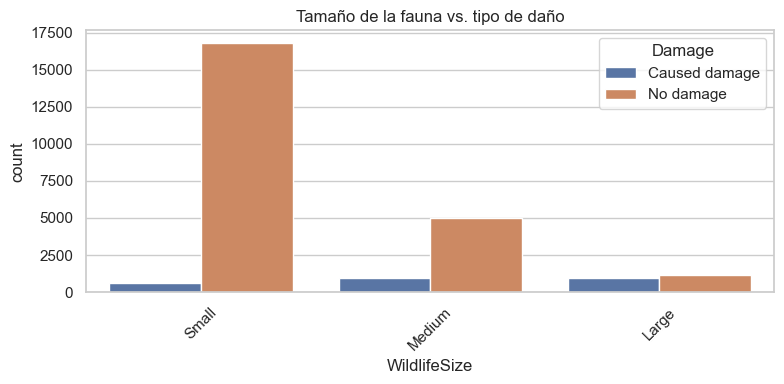

In [23]:
plt.figure(figsize=(8, 4))
sns.countplot(
    data=df,
    x="WildlifeSize",
    hue="Damage",
    order=df["WildlifeSize"].value_counts().index
)
plt.title("Tamaño de la fauna vs. tipo de daño")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2.5 Altitud vs. daño (si AltitudeBin está bien poblada)

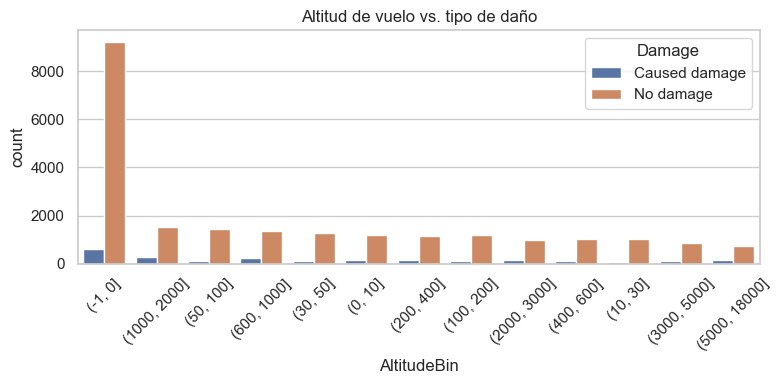

In [24]:
plt.figure(figsize=(8, 4))
sns.countplot(
    data=df,
    x="AltitudeBin",
    hue="Damage",
    order=df["AltitudeBin"].value_counts().index
)
plt.title("Altitud de vuelo vs. tipo de daño")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()